# Machine Learning 101: General Concepts
   
By the end of this section you will

1. Know how to extract features from real-world data in order to perform machine learning tasks.
2. Know the basic categories of `supervised learning`, including `classification` and `regression` problems.
3. Know the basic categories of `unsupervised learning`, including dimensionality reduction and clustering.
4. Understand the distinction between linearly separable and non-linearly separable data.
      
In addition, you will know several tools within scikit-learn which can be used to accomplish the above tasks.

In this section we will begin to explore the basic principles of
machine learning.
Machine Learning is about building **programs with tunable parameters**
(typically an array of floating point values) that are adjusted
automatically so as to improve their behavior by **adapting to
previously seen data**.

> Machine Learning can be considered a **subfield of Artificial Intelligence** since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow **generalizing** rather that just storing and retrieving data items like a database system would do.

# 1. Features and Feature Extraction

Most machine learning algorithms implemented in ``scikit-learn`` expect a numpy array as input ``X``. 

The expected shape of ``X`` is **(n_samples, n_features)**

* **n_samples**: The number of samples: each sample is an item to process (e.g. classify).
  * A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

* **``n_features``**: The number of features or distinct traits that can be used to describe each item in a quantitative manner.
  * The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. In this case we may use ``scipy.sparse`` matrices instead of ``numpy`` arrays so as to make the data fit in memory.

## 1.1 A simple example: the iris dataset

![](./images/iris.jpg)

The machine learning community often uses a simple flowers database where each row in the database (or CSV file) is a set of
measurements of an individual iris flower.

Each sample in this dataset is described by 4 features and can belong to one of the target classes:

* **Features** in the Iris dataset:
   0. sepal length in cm
   1. sepal width in cm
   2. petal length in cm
   3. petal width in cm


* **Target** classes to predict:
   0. Iris Setosa
   1. Iris Versicolour
   2. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a
helper function to load it into numpy arrays::

In [72]:
from sklearn.datasets import load_iris
iris = load_iris()

The features of each sample flower are stored in the ``data`` attribute of the dataset::

In [73]:
n_samples, n_features = iris.data.shape

In [74]:
n_samples

150L

In [75]:
n_features

4L

In [76]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

The information about the class of each sample is stored in the `target`` attribute of the dataset::

In [77]:
len(iris.target) == n_samples

True

In [78]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The names of the classes are stored in the last attribute, namely ``target_names``::

In [79]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

## 1.2 Handling categorical features

Sometimes people describe samples with categorical descriptors that have no obvious numerical representation.

For instance assume that each flower is further described by a color name among a fixed list of color names:

```python
color in ['purple', 'blue', 'red']
```

![](./images/iris_color.jpg)

The simple way to turn this categorical feature into numerical
features suitable for machine learning is to create new features
for each distinct color name that can be valued to ``1.0`` if the
category is matching or ``0.0`` if not.

The enriched iris feature set would hence be in this case:

  0. sepal length in cm
  1. sepal width in cm
  2. petal length in cm
  3. petal width in cm
  4. color#purple (1.0 or 0.0)
  5. color#blue (1.0 or 0.0)
  6. color#red (1.0 or 0.0)

## 1.3 Extracting features from unstructured data

The previous example deals with features that are readily available in a structured dataset with rows and columns of numerical or categorical values.

However, **most of the produced data is not readily available in a structured representation** such as SQL, CSV, XML, JSON or RDF.

Here is an overview of strategies to turn unstructed data items into arrays of numerical features.

#### Text documents

Count the frequency of each word or pair of consecutive words in each document. This approach is called `Bag of Words <http://scikit-learn.org/dev/modules/feature_extraction.html#text-feature-extraction>`_

*Note: we include other file formats such as HTML and PDF in this category: an ad-hoc preprocessing step is required to extract the plain text in UTF-8 encoding for instance.*

#### Images

- Rescale the picture to a fixed size and **take all the raw
  pixels values** (with or without luminosity normalization)

- Take some transformation of the signal (gradients in each
  pixel, wavelets transforms...)

- Compute the Euclidean, Manhattan or cosine **similarities of
  the sample to a set reference prototype images** aranged in a
  code book.  The code book may have been previously extracted
  from the same dataset using an unsupervised learning algorithm
  on the raw pixel signal.

  Each feature value is the distance to one element of the code
  book.

- Perform **local feature extraction**: split the picture into
  small regions and perform feature extraction locally in each
  area.

  Then combine all the features of the individual areas into a
  single array.

#### Sounds

Same strategy as for images within a 1D space instead of 2D

Practical implementations of such feature extraction strategies will be presented in the last sections of this tutorial.

# 2. Supervised Learning, Unsupervised Learning

Machine learning can be broken into two broad regimes: `supervised learning` and `unsupervised learning`. 

We'll introduce these concepts here, and discuss them in more detail below.

In **Supervised Learning**, we have a dataset consisting of both *features* and *labels*.  The task is to construct an estimator which is able to predict the label of an object given the set of features.
A relatively simple example is predicting the species of iris given a set of measurements of its flower.  This is a relatively simple task.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like (A famous example
  is the `Netflix Prize <http://en.wikipedia.org/wiki/Netflix_prize>`_).
  
What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined
from other observed quantities.  Supervised learning is further broken
down into two categories, *classification* and *regression*.  In
classification, the label is discrete, while in regression, the label
is continuous.  For example, in astronomy, the task of determining
whether an object is a star, a galaxy, or a quasar is a classification
problem: the label is from three distinct categories.  On the other
hand, we might wish to determine the age of an object based on
such observations: this would be a regression problem: the label (age)
is a continuous quantity.

**Unsupervised Learning** addresses a different sort of problem.  Here
the data has no labels, and we are interested in finding similarities
between the objects in question.  In a sense, you can think of unsupervised
learning as a means of discovering labels from the data itself.
Unsupervised learning comprises
tasks such as dimensionality reduction, clustering, and density estimation.
For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best 
display the structure of the data.  As we'll see below, such a projection
of the data can be used to visualize the four-dimensional dataset in
two dimensions.

Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features
  or combinations of features are most important in distinguishing between
  galaxies.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two (this is called the
  `blind source separation <http://en.wikipedia.org/wiki/Blind_signal_separation>`_ problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

``scikit-learn`` strives to have a uniform interface across all methods, and we'll see examples of these below.  Given a ``scikit-learn`` estimator object named ``model``, the following methods are available:

- **Available in all Estimators**

  - ``model.fit()`` : fit training data.  For supervised learning applications,
    this accepts two arguments: the data ``X`` and the labels ``y``
    (e.g. ``model.fit(X, y)``).  For unsupervised learning applications,
    this accepts only a single argument, the data ``X``
    (e.g. ``model.fit(X)``).

- **Available in supervised estimators**

  - ``model.predict()`` : given a trained model, predict the label of
    a new set of data.  This method accepts one argument, the new
    data ``X_new`` (e.g. ``model.predict(X_new)``), and returns the
    learned label for each object in the array.
  - ``model.predict_proba()`` : For classification problems,
    some estimators also provide this method, which returns the probability
    that a new observation has each categorical label.  In this case, the
    label with the highest probability is returned by ``model.predict()``.

- **Available in unsupervised estimators**

  - ``model.transform()`` : given an unsupervised model, transform new data
    into the new basis.  This also accepts one argument ``X_new``, and
    returns the new representation of the data based on the unsupervised
    model.
  - ``model.fit_transform()`` : some estimators implement this method,
    which performs a ``fit`` and a ``transform`` on the same input data.


.. _astro_supervised_learning:

# 3. Supervised Learning: `model.fit(X, y)`

![](./images/supervised.png)

Overview of supervised Learning with scikit-learn

As mentioned above, a supervised learning algorithm makes the distinction
between the raw observed data ``X`` with shape ``(n_samples, n_features)``
and some label given to the model during training. In ``scikit-learn``
this array is often noted ``y`` and has generally the shape ``(n_samples,)``.
After training, the fitted model will try to predict the most likely labels
``y_new`` for new a set of samples ``X_new``.

Depending on the nature of the target ``y``, supervised learning
can be given different names:

  - If ``y`` has values in a fixed set of **categorical outcomes**
    (represented by **integers**) the task to predict ``y`` is called
    **classification**.

  - If ``y`` has **floating point values** (e.g. to represent a price,
    a temperature, a size...), the task to predict ``y`` is called
    **regression**.


## 3.1 Classification

Classification is the task of predicting the value of a categorical
variable given some input variables (a.k.a. the features or "predictors").
This section includes a first exploration of classification with scikit-learn.

We'll explore a detailed example of classification with astronomical data in :ref:`astronomy_classification`.

A first classifier example with ``scikit-learn``

In the iris dataset example, suppose we are assigned the task to
guess the class of an individual flower given the measurements of
petals and sepals. This is a classification task, hence we have::

In [80]:
X, y = iris.data, iris.target

Once the data has this format it is trivial to train a classifier,
for instance a support vector machine with a linear kernel::

In [81]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

``clf`` is a statistical model that has parameters that control the
learning algorithm (those parameters are sometimes called the
hyperparameters). Those hyperparameters can be supplied by the
user in the constructor of the model. We will explain later how to choose
a good combination using either simple empirical rules or data
driven selection::

In [82]:
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

By default the real model parameters are not initialized. They will be
tuned automatically from the data by calling the ``fit`` method::

In [83]:
clf = clf.fit(X, y)

In [84]:
clf.coef_                         # doctest: +ELLIPSIS

array([[ 0.18424024,  0.45122654, -0.80794225, -0.45071476],
       [ 0.05270945, -0.88842989,  0.40269514, -0.93722637],
       [-0.8507835 , -0.98675802,  1.38087105,  1.865366  ]])

In [85]:
clf.intercept_                    # doctest: +ELLIPSIS

array([ 0.10956143,  1.65785413, -1.70982133])

Once the model is trained, it can be used to predict the most likely outcome on
unseen data. For instance let us define a list of simple sample that looks
like the first sample of the iris dataset::

In [86]:
X_new = [[ 5.0,  3.6,  1.3,  0.25]]

In [87]:
clf.predict(X_new)

array([0])

The outcome is ``0`` which is the id of the first iris class, namely
'setosa'.

The following figure places the location of the ``fit`` and ``predict``
calls on the previous flow diagram. The ``vec`` object is a vectorizer
used for feature extraction that is not used in the case of the iris
data (it already comes as vectors of features):

Some ``scikit-learn`` classifiers can further predict probabilities
of the outcome.  This is the case of logistic regression models::

In [88]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression().fit(X, y)
clf2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [89]:
clf2.predict_proba(X_new)

array([[  9.07512928e-01,   9.24770379e-02,   1.00343962e-05]])

This means that the model estimates that the sample in ``X_new`` has:

  - 90% likelyhood to belong to the 'setosa' class

  - 9% likelyhood to belong to the 'versicolor' class

  - 1% likelyhood to belong to the 'virginica' class

Of course, the ``predict`` method that outputs the label id of the
most likely outcome is also available::

In [90]:
clf2.predict(X_new)

array([0])

### 3.1.2 Notable implementations of classifiers


* `sklearn.linear_model.LogisticRegression`

  Regularized Logistic Regression based on ``liblinear``

* `sklearn.svm.LinearSVC`

  Support Vector Machines without kernels based on ``liblinear``

* `sklearn.svm.SVC`

  Support Vector Machines with kernels based on ``libsvm``

* `sklearn.linear_model.SGDClassifier`

  Regularized linear models (SVM or logistic regression) using a Stochastic
  Gradient Descent algorithm written in ``Cython``

* `sklearn.neighbors.NeighborsClassifier`

  k-Nearest Neighbors classifier based on the ball tree datastructure for low
  dimensional data and brute force search for high dimensional data

* `sklearn.naive_bayes.GaussianNB`

  Gaussian Naive Bayes model.  This is an unsophisticated  model which can be trained very quickly.  It is often used to obtain baseline results before moving to a more sophisticated classifier.

### 3.1.3 Sample application of classifiers


The following table gives examples of applications of classifiers
for some common engineering tasks:

<table style="width: 100%">
<thead>
<tr>
<th>Task</th>
<th>Predicted outcomes</th>
</tr>
</thead>

<tbody>
<tr>
<td>E-mail classification</td>
<td>Spam, normal, priority mail</td>
</tr>

<tr>
<td>Language identification in text documents</td>
<td>en, es, de, fr, ja, zh, ar, ru...</td>
</tr>

<tr>
<td>News articles categorization</td>
<td>Business, technology, sports...</td>
</tr>

<tr>
<td>Sentiment analysis in customer feedback </td>
<td>Negative, neutral, positive</td>
</tr>

<tr>
<td>Face verification in pictures</td>
<td>Same / different person</td>
</tr>


<tr>
<td>Speaker verification in voice recordings</td>
<td>Same / different person</td>
</tr>

<tr>
<td>Astronomical Sources </td>
<td>Object type or class</td>
</tr>
</tbody>
</table>

## 3.2 Regression

Regression is the task of predicting the value of a continuously varying variable (e.g. a price, a temperature, a conversion rate...) given
some input variables (a.k.a. the features, "predictors" or "regressors").  We'll explore a detailed example of regression with
astronomical data in :ref:`astronomy_regression`.

Some notable implementations of regression models in ``scikit-learn`` include:

* `sklearn.linear_model.Ridge`

  L2-regularized least squares linear model

* `sklearn.linear_model.ElasticNet`

  L1+L2-regularized least squares linear model trained using
  Coordinate Descent

* `sklearn.linear_model.LassoLARS`

  L1-regularized least squares linear model trained with Least Angle
  Regression

* `sklearn.linear_model.SGDRegressor`

  L1+L2-regularized least squares linear model trained using
  Stochastic Gradient Descent

* `sklearn.linear_model.ARDRegression`

  Bayesian Automated Relevance Determination regression

* `sklearn.svm.SVR`

  Non-linear regression using Support Vector Machines (wrapper for
  ``libsvm``)

* `sklearn.ensemble.RandomForestRegressor`

  An ensemble method which constructs multiple decision trees from subsets
  of the data.

# 4. Unsupervised Learning: `model.fit(X)`

![](./images/unsupervised.png)

Unsupervised Learning overview

An unsupervised learning algorithm only uses a single set of observations ``X`` with shape ``(n_samples, n_features)`` and does
not use any kind of labels.

An unsupervised learning model will try to fit its parameters so as to best summarize regularities found in the data.

The following introduces the main variants of unsupervised learning algorithms, namely dimensionality reduction and clustering.

## 4.1 Dimensionality Reduction and Visualization

Dimensionality reduction is the task of deriving a set of **new artificial
features** that is **smaller** than the original feature set while
retaining **most of the variance** of the original data.

### 4.1.1 Normalization and visualization with PCA

The most common technique for dimensionality reduction is called
**Principal Component Analysis**.

PCA can be done using linear combinations of the original features
using a truncated [Singular Value Decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition#Truncated_SVD)
of the matrix ``X`` so as to project the data onto a base of the top singular vectors.

If the number of retained components is 2 or 3, PCA can be used to visualize the dataset::

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

Once fitted, the ``pca`` model exposes the singular vectors in the ``components_`` attribute::

In [92]:
pca.components_                                      # doctest: +ELLIPSIS

array([[ 0.17650757, -0.04015901,  0.41812992,  0.17516725],
       [-1.33840478, -1.48757227,  0.35831476,  0.15229463]])

In [93]:
pca.explained_variance_ratio_                        # doctest: +ELLIPSIS

array([ 0.92461621,  0.05301557])

In [94]:
pca.explained_variance_ratio_.sum()                  # doctest: +ELLIPSIS

0.97763177502480336

Let us project the iris dataset along those first 2 dimensions::

In [95]:
X_pca = pca.transform(X)

The dataset has been "normalized", which means that the data is now centered on both components with unit variance::

In [96]:
import numpy as np
np.round(X_pca.mean(axis=0), decimals=5)

array([ 0.,  0.])

In [97]:
np.round(X_pca.std(axis=0), decimals=5)

array([ 1.,  1.])

Furthermore the samples components do no longer carry any linear correlation

In [98]:
import numpy as np
np.round(np.corrcoef(X_pca.T), decimals=5)

array([[ 1.,  0.],
       [ 0.,  1.]])

We can visualize the dataset using ``pylab``, for instance by defining the following utility function

In [99]:
%matplotlib inline
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
  colors = cycle('rgbcmykw')
  target_ids = range(len(target_names))
  pl.figure()
  for i, c, label in zip(target_ids, colors, target_names):
      pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
  pl.legend()
  pl.show()

Calling ``plot_2D(X_pca, iris.target, iris.target_names)`` will display the following:

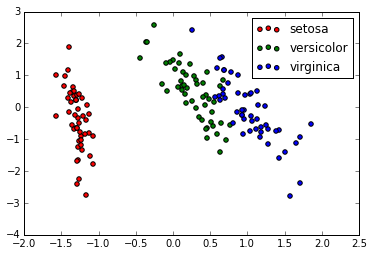

In [100]:
plot_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is unsupervised.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.


.. note::

  The default implementation of PCA computes the SVD of the full
  data matrix, which is not scalable when both ``n_samples`` and
  ``n_features`` are big (more that a few thousands).

  If you are interested in a number of components that is much
  smaller than both ``n_samples`` and ``n_features``, consider using
  :class:`sklearn.decomposition.RandomizedPCA` instead.

### 4.1.2 Other applications of dimensionality reduction

Dimensionality Reduction is not just useful for visualization of
high dimensional datasets. It can also be used as a preprocessing
step (often called data normalization) to help speed up supervised
machine learning methods that are not computationally efficient with high
``n_features`` such as SVM classifiers with gaussian kernels for
instance or that do not work well with linearly correlated features.

## 4.2 Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or dissimilarity
measure (such as the Euclidean distance).

For example, let us reuse the output of the 2D PCA of the iris dataset and try to find 3 groups  of samples using the simplest
clustering algorithm (KMeans)

In [101]:
from sklearn.cluster import KMeans
from numpy.random import RandomState

rng = RandomState(42)
kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 1.02, -0.71],
       [ 0.33,  0.89],
       [-1.29, -0.44]])

In [102]:
kmeans.labels_[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [103]:
kmeans.labels_[-10:]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

We can plot the assigned cluster labels instead of the target names
with::

   plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

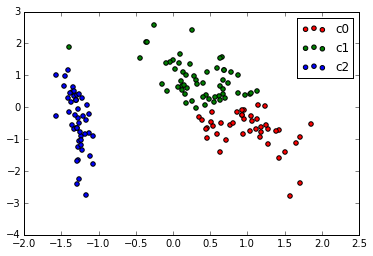

In [104]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

Repeat the clustering algorithm from above, but fit the clusters to the full dataset ``X`` rather than the projection ``X_pca``.  Do the
labels computed this way better match the true labels?

### 4.1.2 Notable implementations of clustering models\


The following are two well-known clustering algorithms. Like most
unsupervised learning models in the scikit, they expect the data
to be clustered to have the shape ``(n_samples, n_features)``:

* `sklearn.cluster.KMeans`

  The simplest, yet effective clustering algorithm. Needs to be
  provided with the number of clusters in advance, and assumes that the
  data is normalized as input (but use a PCA model as preprocessor).

* `sklearn.cluster.MeanShift`

  Can find better looking clusters than KMeans but is not scalable
  to high number of samples.

* `sklearn.cluster.DBSCAN`
  Can detect irregularly shaped clusters based on density, i.e. sparse regions
  in the input space are likely to become inter-cluster boundaries. Can also
  detect outliers (samples that are not part of a cluster).

* `sklearn.manifold.LocallyLinearEmbedding`

  Locally Linear Embedding is a nonlinear neighbors-based
  manifold learning technique.
  The scikit-learn implementation makes available several variants to
  the basic algorithm.

* `sklearn.manifold.Isomap`

  Isomap is another neighbors-based manifold learning method that can find
  nonlinear projections of data.

Other clustering algorithms do not work with a data array of shape
``(n_samples, n_features)`` but directly with a precomputed affinity matrix
of shape ``(n_samples, n_samples)``:

* `sklearn.cluster.AffinityPropagation`

  Clustering algorithm based on message passing between data points.

* `sklearn.cluster.SpectralClustering`

  KMeans applied to a projection of the normalized graph Laplacian:
  finds normalized graph cuts if the affinity matrix is interpreted
  as an adjacency matrix of a graph.

* `sklearn.cluster.Ward`

  ``Ward`` implements hierarchical clustering based on the Ward algorithm,
     a variance-minimizing approach. At each step, it minimizes the sum of
     squared differences within all clusters (inertia criterion).

``DBSCAN`` can work with either an array of samples or an affinity matrix.

#### Applications of clustering


Here are some common applications of clustering algorithms:

- Building customer profiles for market analysis

- Grouping related web news (e.g. Google News) and websearch results

- Grouping related stock quotes for investment portfolio management

- Can be used as a preprocessing step for recommender systems

- Can be used to build a code book of prototype samples for unsupervised
  feature extraction for supervised learning algorithms


# 5. Linearly separable data


Some supervised learning problems can be solved by very simple
models (called generalized linear models) depending on the data.
Others simply don't.

To grasp the difference between the two cases, run the interactive
example from the ``examples`` folder of the ``scikit-learn`` source
distribution.  (if you don't have the scikit-learn source code locally
installed, you can find the script `here <auto_examples/svm_gui.html>`_)::

    % python $SKL_HOME/examples/svm_gui.py

1. Put some data points belonging to one of the two target classes
   ('white' or 'black') using left click and right click.

2. Choose some parameters of a Support Vector Machine to be trained on
   this toy dataset (``n_samples`` is the number of clicks, ``n_features``
   is 2).

3. Click the Fit but to train the model and see the decision boundary.
   The accurracy of the model is displayed on stdout.

The following figures demonstrate one case where a linear model can
perfectly separate the two classes while the other is not linearly
separable (a model with a gaussian kernel is required in that case).


.. figure:: auto_examples/images/plot_gui_example_1.png
   :target: auto_examples/plot_gui_example.html
   :scale: 65 %
   :align: center
   :alt: Example of a linear SVM fit

   Linear Support Vector Machine trained to perfectly separate 2 sets of
   data points labeled as white and black in a 2D space.


.. figure:: auto_examples/images/plot_gui_example_2.png
   :target: auto_examples/plot_gui_example.html
   :scale: 65 %
   :align: center
   :alt: Example of a gaussian SVM fit

   Support Vector Machine with gaussian kernel trained to separate 2 sets of
   data points labeled as white and black in a 2D space. This dataset would
   not have been seperated by a simple linear model.

.. topic:: **Exercise**
   :class: green

   Fit a model that is able to solve the XOR problem using the GUI:
   the XOR problem is composed of 4 samples:

     - 2 white samples in the top-left and bottom-right corners

     - 2 black samples in the bottom-left and top-right corners

   **Question**: is the XOR problem linearly separable?

.. topic:: **Exercise**
   :class: green

   Construct a problem with less than 10 points where the predictive
   accuracy of the best linear model is 50%.

.. note::

  the higher the dimension of the feature space, the more likely
  the data is linearly separable: for instance this is often the
  case for text classification tasks.

# 6. Hyperparameters, training set, test set and overfitting


The above SVM example displays an example of *hyperparameters*, which are
model parameters set before the training process.  For example, when using
an RBF model, we choose the kernel coefficient ``gamma`` before fitting the
data. We must be able to then evaluate the goodness-of-fit of our model
given this choice of hyperparameter.

The most common mistake beginners make when training statistical
models is to evaluate the quality of the model on the same data
used for fitting the model:

  If you do this, **you are doing it wrong!**

#### The overfitting issue


Evaluating the quality of the model on the data used to fit the model can
lead to *overfitting*.  Consider the following dataset, and three fits to
the data (we'll explore this example in more detail in the
:ref:`next section <astro_biasvariance>`).

.. figure:: auto_examples/images/plot_bias_variance_examples_2.png
   :target: auto_examples/plot_bias_variance_examples.html
   :align: center
   :scale: 80%

   Examples of over-fitting and under-fitting a two-dimensional dataset.

Evaluating the :math:`d=6` model using the training data might lead you to
believe the model is very good, when in fact it does not do a good job of
representing the data.
The problem lies in the fact that some models can be subject to the
**overfitting** issue: they can **learn the training data by heart**
without generalizing. The symptoms are:

  - the predictive accurracy on the data used for training can be excellent
    (sometimes 100%)

  - however, the models do little better than random prediction when facing
    new data that was not part of the training set

If you evaluate your model on your training data you won't be able to tell
whether your model is overfitting or not.

#### Solutions to overfitting

The solution to this issue is twofold:

  1. Split your data into two sets to detect overfitting situations:

    - one for training and model selection: the **training set**

    - one for evaluation: the **test set**

  2. Avoid overfitting by using simpler models (e.g. linear classifiers
     instead of gaussian kernel SVM) or by increasing the regularization
     parameter of the model if available (see the docstring of the
     model for details)

An even better option when experimenting with classifiers is to divide
the data into three sets: training, testing and holdout. You can then
optimize your features, settings and algorithms for the testing set until
they seem good enough, and finally test on the holdout set (perhaps after
adding the test set to the training set).

When the amount of labeled data available is small, it may not be feasible
to construct training and test sets. In that case, you can choose to
use **k-fold cross validation**:
divide the dataset into `k` = 10 parts of (roughly) equal size, then for
each of these ten parts, train the classifier on the other nine and test
on the held-out part.


Measuring classification performance on a test set
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

.. note::

   The information in this section is available in an interactive notebook
   :download:`05_iris_crossval.ipynb <notebooks/05_iris_crossval.ipynb>`,
   which can be viewed using `iPython notebook`_.    An online static view can
   be seen `here <http://nbviewer.ipython.org/url/astroml.github.com/sklearn_tutorial/_downloads/05_iris_crossval.ipynb>`_

Here is an example on you to split the data on the iris dataset.

In [105]:
indices = np.arange(n_samples)

In [106]:
indices[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [107]:
RandomState(42).shuffle(indices)

In [108]:
indices[:10]

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82], dtype=int64)

In [109]:
X = iris.data[indices]
y = iris.target[indices]

We can now split the data using a 2/3 - 1/3 ratio::

In [110]:
split = (n_samples * 2) / 3

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape
# (100, 4)

X_test.shape
# (50, 4)

y_train.shape
# (100,)

y_test.shape
# (50,)

(50L,)

We can now re-train a new linear classifier on the training set only::

In [111]:
clf = LinearSVC().fit(X_train, y_train)

To evaluate its quality we can compute the average number of correct
classifications on the test set::

In [112]:
np.mean(clf.predict(X_test) == y_test)

1.0

This shows that the model has a predictive accurracy of 100% which
means that the classification model was perfectly capable of
generalizing what was learned from the training set to the test
set: this is rarely so easy on real life datasets as we will see
in the following chapter.

In the :ref:`next section <astro_biasvariance>`, we will explore in more
detail the bias-variance tradeoff and the practical use of machine learning
techniques.

# 7. Key takeaway points

- Build ``X`` (features vectors) with shape ``(n_samples, n_features)``

- Supervised learning: ``clf.fit(X, y)`` and then ``clf.predict(X_new)``

  - Classification: ``y`` is an array of integers

  - Regression: ``y`` is an array of floats

- Unsupervised learning: ``clf.fit(X)``

  - Dimensionality Reduction with ``clf.transform(X_new)``

    - for visualization

    - for scalability

  - Clustering finds group id for each sample

- Some models work much better with data normalized with PCA

- Simple linear models can fail completely (non linearly separable data)

- Simple linear models often very useful in practice (esp. with
  large ``n_features``)

- Before starting to train a model: split train / test data:

  - use training set for model selection and fitting

  - use test set for model evaluation

  - use cross-validation when your dataset is small

- Complex models can overfit (learn by heart) the training data and
  fail to generalize correctly on test data:

  - try simpler models first

  - tune the regularization parameter on a validation set

# References

* [http://www.astroml.org/sklearn_tutorial/general_concepts.html](http://www.astroml.org/sklearn_tutorial/general_concepts.html)